In [53]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve

In [4]:
IMAGE_PATH = '../data/train_images'
DATA_PATH = '../data/binaryData'
METADATA_PATH = '../data/binaryData/test_data.csv'


TRAIN_INPUT_PATH = DATA_PATH + '/' + 'X_train_binary.pth' 
TRAIN_LABEL_PATH = DATA_PATH + '/' + 'y_train_binary.pth'
VAL_INPUT_PATH = DATA_PATH + '/' + 'X_val_binary.pth' 
VAL_LABEL_PATH = DATA_PATH + '/' + 'y_val_binary.pth'
TEST_INPUT_PATH = DATA_PATH + '/' + 'X_test_binary.pth' 
TEST_LABEL_PATH = DATA_PATH + '/' + 'y_test_binary.pth'

In [5]:
X_train, y_train = torch.load(TRAIN_INPUT_PATH), torch.load(TRAIN_LABEL_PATH)
X_val, y_val = torch.load(VAL_INPUT_PATH), torch.load(VAL_LABEL_PATH)
X_test, y_test = torch.load(TEST_INPUT_PATH), torch.load(TEST_LABEL_PATH)

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1).numpy()
X_val = X_val.reshape(X_val.shape[0], -1).numpy()
X_test = X_test.reshape(X_test.shape[0], -1).numpy()

In [12]:
def pipeline(pca_params, model_params, X_train, y_train, X_val, y_val):
    pca = PCA(**pca_params)
    print('Fitting PCA')
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    print('Fitting Model')
    model = LogisticRegression(**model_params)
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_train)
    y_pred2 = model.predict(X_val)

    acc, f1 = accuracy_score(y_val, y_pred2), f1_score(y_val, y_pred2)
    print('Train:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(accuracy_score(y_train, y_pred1), f1_score(y_train, y_pred1)))
    print('Valid:\tAccuracy: {:.4f}\tF1-score: {:.4f}'.format(acc, f1))
    
    return pca, model, acc, f1

In [13]:
results = []
for values in [0.90, 0.925, 0.95, 0.975, 0.99]:
    result = pipeline({'n_components': values}, {'max_iter': 300}, X_train, y_train, X_val, y_val)
    results.append(result)

Fitting PCA
Fitting Model
Train:	Accuracy: 0.6859	F1-score: 0.6925
Valid:	Accuracy: 0.6917	F1-score: 0.7088
Fitting PCA
Fitting Model
Train:	Accuracy: 0.7413	F1-score: 0.7458
Valid:	Accuracy: 0.7510	F1-score: 0.7641
Fitting PCA
Fitting Model
Train:	Accuracy: 0.7545	F1-score: 0.7584
Valid:	Accuracy: 0.7466	F1-score: 0.7615
Fitting PCA
Fitting Model


C:\Users\fgrim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train:	Accuracy: 0.7690	F1-score: 0.7753
Valid:	Accuracy: 0.7383	F1-score: 0.7593
Fitting PCA
Fitting Model
Train:	Accuracy: 0.8215	F1-score: 0.8282
Valid:	Accuracy: 0.7156	F1-score: 0.7465


C:\Users\fgrim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
var = [0.90, 0.925, 0.95, 0.975, 0.99]
n_comp = [i[0].n_components_ for i in results]

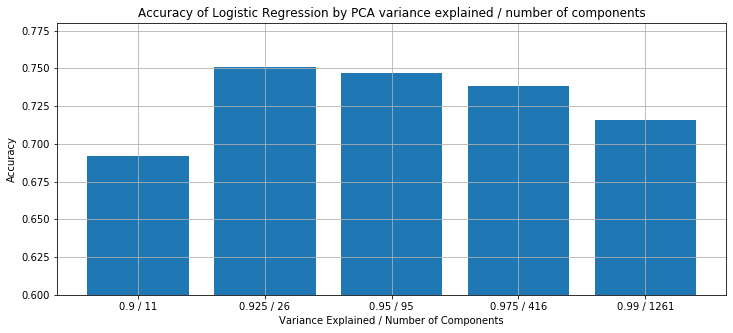

In [43]:
fig = plt.figure(figsize = (12, 5))
plt.bar([str(i)+' / '+str(j) for i,j in zip(var, n_comp)] , [i[2] for i in results])
plt.grid()
plt.ylim([0.6, 0.78])
plt.title('Accuracy of Logistic Regression by PCA variance explained / number of components')
plt.xlabel('Variance Explained / Number of Components')
plt.ylabel('Accuracy')
plt.show()

In [48]:
pca = results[1][0]
model = results[1][1]
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)
y_score = model.predict_proba(X_test_pca)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_pred, y_test)))
print('F1 score: {:.3f}'.format(f1_score(y_pred, y_test)))

Accuracy score: 0.751
F1 score: 0.757


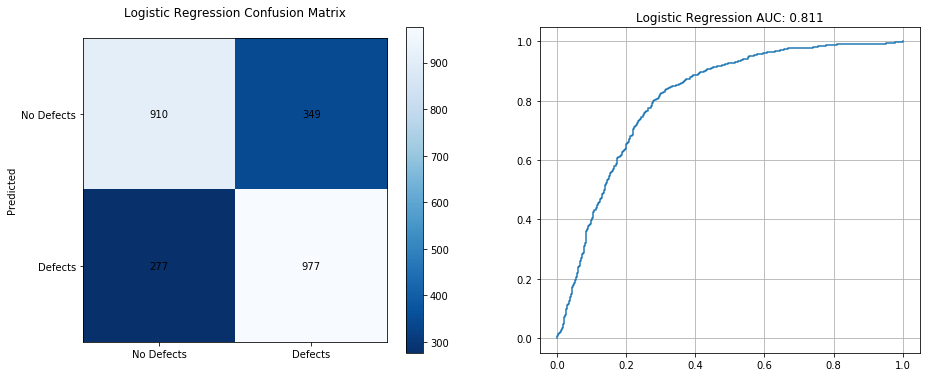

In [68]:
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(1, 2, 1)
cm = confusion_matrix(y_pred, y_test)
cm_plot = ax.matshow(cm, cmap='Blues_r')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('Predicted')
ax.set_yticklabels(['No Defects', 'No Defects', 'Defects'])
plt.colorbar(cm_plot)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['No Defects', 'No Defects', 'Defects'])
for i in range(2):
    for j in range(2):
        k = 0
        ax.text(j, i, cm[i, j], va='center', ha='center')
                   
ax = fig.add_subplot(1, 2, 2)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score[:, 0])
roc_auc = auc(tpr, fpr)
ax.plot(tpr, fpr)
ax.grid()
ax.set_title('Logistic Regression AUC: {:.3f}'.format(roc_auc))
plt.show()